In [2]:
import pickle

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold

from yellowbrick.regressor import ResidualsPlot

from sklearn.model_selection import cross_val_score


df_less is my DF with 11 features + my target

In [3]:
with open('/Users/robertpagano/src/metis_project_luther/regression_data_v3_less_features.pickle', "rb") as to_read:
    df_less = pickle.load(to_read)

In [5]:
df_less.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12318 entries, 6 to 24828
Data columns (total 12 columns):
Attendance            12318 non-null float64
Rank                  12318 non-null int64
GB                    12318 non-null float64
is_night              12318 non-null int64
run_differential      12318 non-null int64
Win_differential      12318 non-null int64
Wins_last_10          12318 non-null float64
batter_age            12318 non-null float64
current_all_stars     12318 non-null int64
lifetime_all_stars    12318 non-null int64
player_salary         12318 non-null int64
is_weekend            12318 non-null int64
dtypes: float64(4), int64(8)
memory usage: 1.2 MB


df_max is my DF with 22 features + my target

In [6]:
with open('/Users/robertpagano/src/metis_project_luther/regression_data_v3_max_features.pickle', "rb") as to_read:
    df_max = pickle.load(to_read)

In [8]:
df_max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12318 entries, 6 to 24828
Data columns (total 23 columns):
Attendance                12318 non-null float64
Gm#                       12318 non-null int64
Rank                      12318 non-null int64
GB                        12318 non-null float64
is_night                  12318 non-null int64
run_differential          12318 non-null int64
Win_differential          12318 non-null int64
Wins_last_10              12318 non-null float64
Mean_runs_last_10         12318 non-null float64
batter_age                12318 non-null float64
current_all_stars         12318 non-null int64
lifetime_all_stars        12318 non-null int64
player_salary             12318 non-null int64
Opp_Wins_last_10          12318 non-null float64
Opp_Win_differential      12318 non-null int64
Opp_Rank                  12318 non-null int64
Opp_GB                    12318 non-null float64
Opp_Mean_runs_last_10     12318 non-null float64
opp_batter_age            123

X's and Y's created below, first using the DF with less features:

In [9]:
X = df_less.iloc[:, 1:]
y = df_less.iloc[:, 0]

Initiating my train (80%) and test (20%) sets below:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

using standard scaler on the xvalues before the LassoCV:

In [12]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

Scale the Predictors on both the train and test set

In [13]:
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

Run the cross validation, find the best alpha, refit the model on all the data with that alpha

In [33]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr, y_train)

RidgeCV(alphas=array([1.00000e-02, 1.04737e-02, ..., 9.54772e+01, 1.00000e+02]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [21]:
lasso_model.alpha_

2.049074689815848

In [34]:
ridge_model.alpha_

21.711179456945054

These are the (standardized) coefficients found. Since none of them zeroed, I think I should keep them.

In [22]:
list(zip(X_train.columns, lasso_model.coef_))

[('Rank', -29.34737415009242),
 ('GB', 708.8901232568866),
 ('is_night', -453.18307973567346),
 ('run_differential', 671.8289997435562),
 ('Win_differential', 984.4106669772136),
 ('Wins_last_10', 103.43227346902212),
 ('batter_age', -539.7496583769814),
 ('current_all_stars', 293.49005981579086),
 ('lifetime_all_stars', 1501.8860105131168),
 ('player_salary', 4434.301782340875),
 ('is_weekend', 2733.668220810486)]

In [35]:
list(zip(X_train.columns, ridge_model.coef_))

[('Rank', -36.61584695636009),
 ('GB', 712.3053695132326),
 ('is_night', -455.378734658313),
 ('run_differential', 673.6851582649574),
 ('Win_differential', 981.1659354781108),
 ('Wins_last_10', 105.15945679673297),
 ('batter_age', -535.6946415150047),
 ('current_all_stars', 295.5311797130673),
 ('lifetime_all_stars', 1504.6866028770694),
 ('player_salary', 4420.779519508743),
 ('is_weekend', 2729.1207533095408)]

In [82]:
from sklearn.metrics import r2_score
###look here to import more metrics###

In [39]:
lasso_model.score(X_tr, y_train)

0.4382648183081012

In [38]:
ridge_model.score(X_tr, y_train)

0.438263224430955

In [43]:
yhat_lasso = lasso_model.predict(X_tr)
yhat_ridge = ridge_model.predict(X_tr)
residuals_l = y_train - yhat_lasso
residuals_r = y_train - yhat_ridge


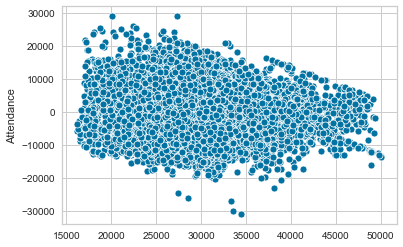

In [44]:
sns.scatterplot(x=yhat_lasso, y=residuals_l);

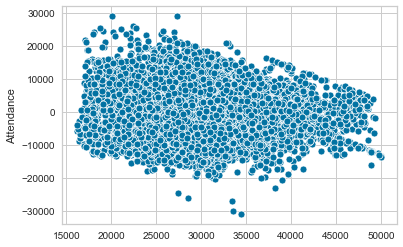

In [45]:
sns.scatterplot(x=yhat_ridge, y=residuals_r);

So now I have my two models! First I'm going to go through Lasso and see if I can do any feature engineering. I'll plot my residuals against all my features one by one and see what kind of shapes I get:

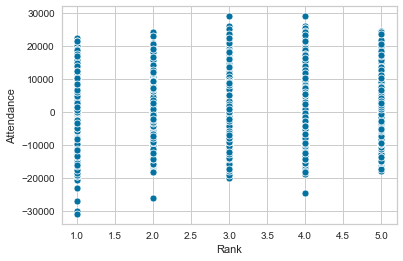

In [49]:
sns.scatterplot(x=df_less['Rank'], y=residuals_l);

## This looks a bit odd, may come back....

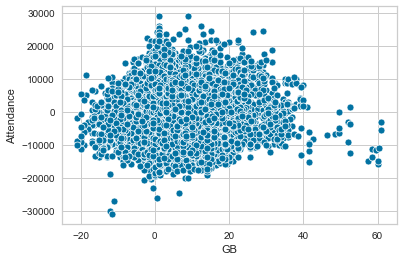

In [63]:
sns.scatterplot(x=df_less['GB'], y=residuals_l);

## the tails on the right seem to have lower attendance, should come back to this as well

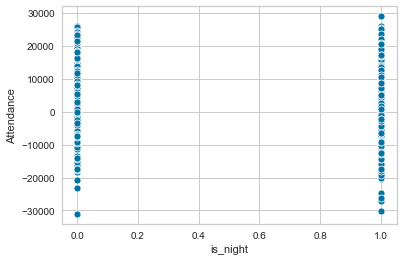

In [51]:
sns.scatterplot(x=df_less['is_night'], y=residuals_l);

Above seems OK, might want to check with instructors...

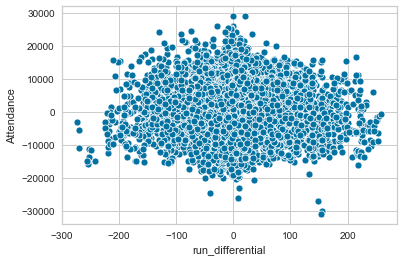

In [52]:
sns.scatterplot(x=df_less['run_differential'], y=residuals_l);

Looks pretty OK, some outliers but to be expected

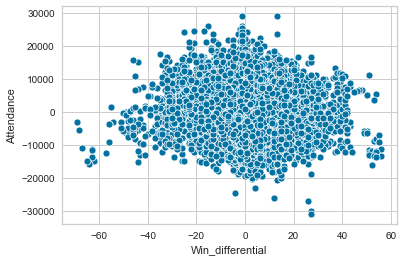

In [47]:
sns.scatterplot(x=df_less['Win_differential'], y=residuals_l);

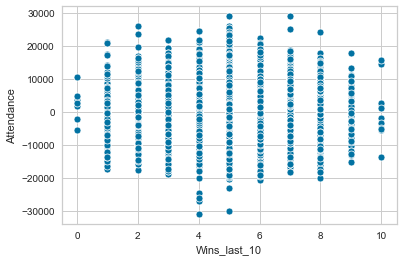

In [53]:
sns.scatterplot(x=df_less['Wins_last_10'], y=residuals_l);

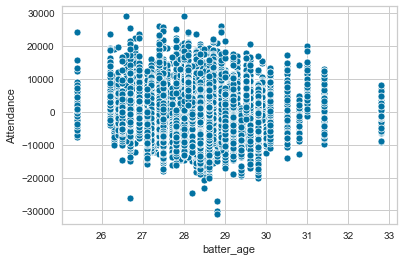

In [54]:
sns.scatterplot(x=df_less['batter_age'], y=residuals_l);

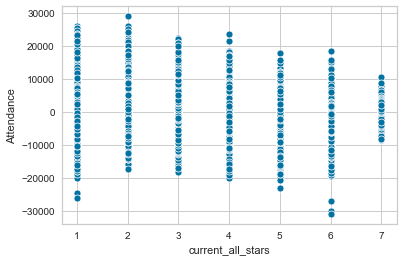

In [55]:
sns.scatterplot(x=df_less['current_all_stars'], y=residuals_l);

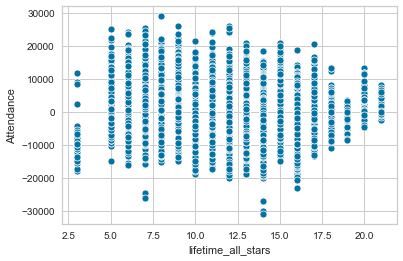

In [57]:
sns.scatterplot(x=df_less['lifetime_all_stars'], y=residuals_l);

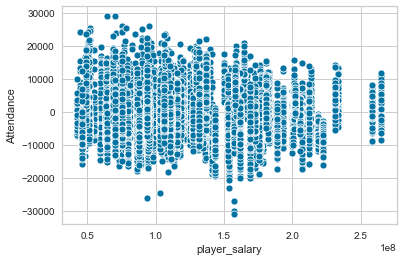

In [58]:
sns.scatterplot(x=df_less['player_salary'], y=residuals_l);

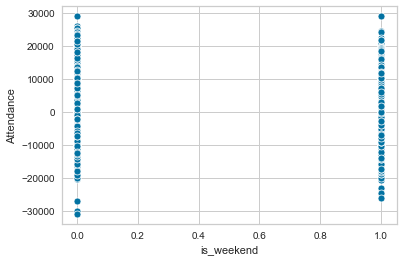

In [59]:
sns.scatterplot(x=df_less['is_weekend'], y=residuals_l);

## Definitely use the below - it shows that the errors are normally distributed in a nice way

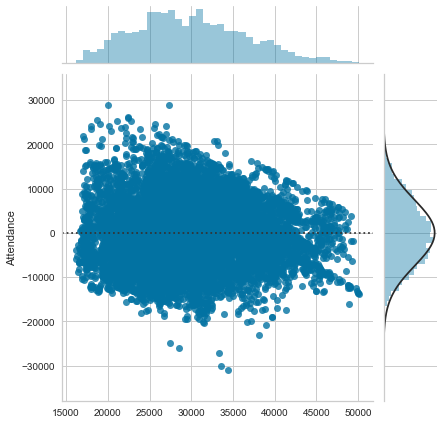

In [76]:
sns.jointplot(x=yhat_lasso, y=residuals_l, kind="resid");

In [78]:
ridge_model.poof()

AttributeError: 'RidgeCV' object has no attribute 'poof'

In [ ]:
##BELOW IS THE FINAL TEST:
# test_set_pred_l = lasso_model.predict(X_te)
# test_set_pred_r = ridge_model.predict(X_te)